# 次元削減に関する関数の比較
ロールケーキと呼ばれる４次元のサンプルデータ（swiss_roll）を、  
次元削減の各種法毎に、二次元に可視化した際の比較を行う  
http://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html#sphx-glr-auto-examples-manifold-plot-manifold-sphere-py

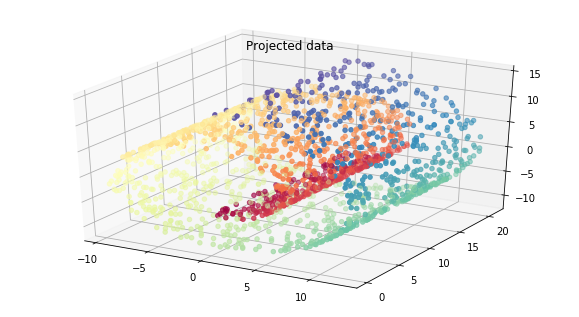

In [1]:
import matplotlib.pyplot as plt

# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D

# データ生成
from sklearn import datasets
X, color = datasets.samples_generator.make_swiss_roll(n_samples=2000)

# Plot
# Notebook出力には次の１行が必要（%matplotlib inlineだとグラフを回転できない）
#%matplotlib notebook

fig = plt.figure(figsize=[10,12])
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")
plt.axis('tight')
plt.title('Projected data')
plt.show()


In [2]:
%matplotlib inline

In [28]:
import pandas as pd
# Xは3次元の座標データ, Colorはカラーマップの数値
df = pd.DataFrame(X[:])
df['color'] = color
df.head(5)


,0,1,2,color
0,12.036907,13.390037,-2.732433,12.343149
1,2.927777,3.154605,-4.415418,5.297905
2,-8.047315,10.314220,-6.053017,10.069672
3,-5.055027,16.127946,-9.194999,10.492917
4,1.174884,1.206384,7.610666,7.700817


## グラフ描画関数

In [2]:
def fig_dimentionality(X_r):
    fig = plt.figure(figsize=[10,12])
    ax = fig.add_subplot(212)
    ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.show()

## PCAによる主成分分析

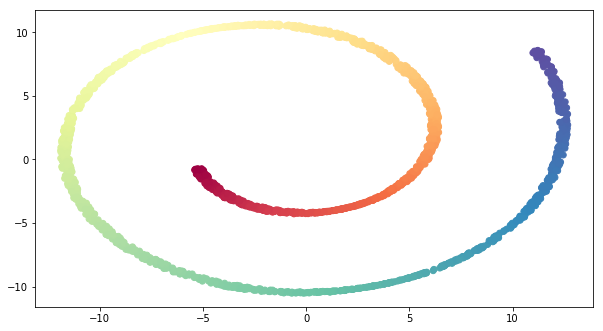

In [3]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_r = pca.transform(X)

#描画
fig_dimentionality(X_r)

## 多次元尺度構成法(MDS (Multi-dimensional scaling))

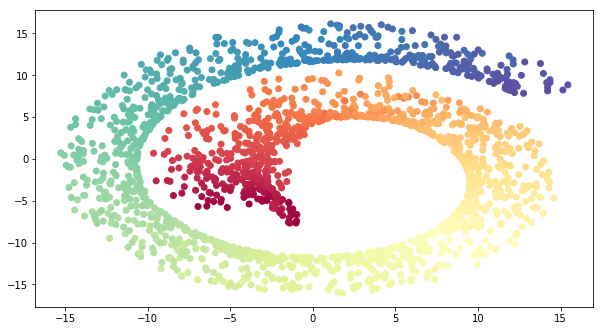

In [8]:
from sklearn import manifold
mds = manifold.MDS(2, max_iter=100, n_init=1)
X_r = mds.fit_transform(X)

#描画
fig_dimentionality(X_r)

## カーネル主成分分析

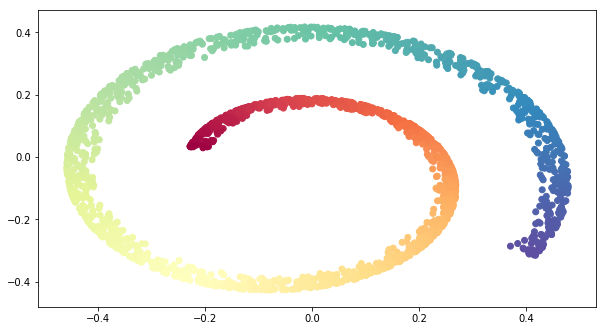

In [27]:
from sklearn import decomposition
kpca = decomposition.KernelPCA(n_components=2,  kernel='rbf', gamma=0.001)
X_r = kpca.fit_transform(X)

#描画
fig_dimentionality(X_r)

## Spectral Embedding.


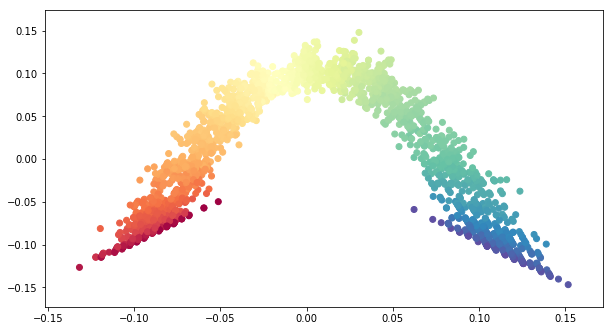

In [14]:
from sklearn import manifold
se = manifold.SpectralEmbedding(n_neighbors=12, n_components=2)
X_r = se.fit_transform(X)

#描画
fig_dimentionality(X_r)

## Isomap（多様体学習）

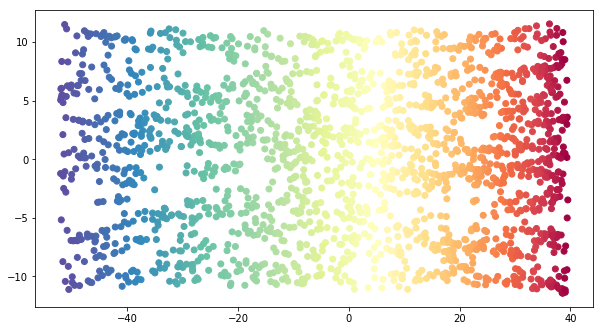

In [6]:
from sklearn import manifold
isomap = manifold.Isomap(n_neighbors=12, n_components=2)
X_r = isomap.fit(X).transform(X)

#描画
fig_dimentionality(X_r)

## Locally linear embedding (LLE) （多様体学習）による

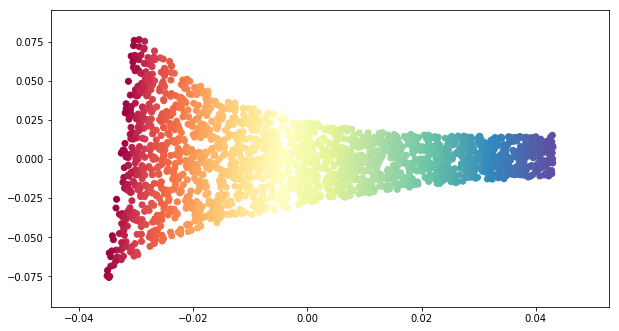

In [4]:
from sklearn import manifold
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12, n_components=2)

#描画
fig_dimentionality(X_r)

##### 多様体学習は他に ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']などある

## t-SNE( t-distributed stochastic neighbor embedding)
PCAやMDSが不得手な非線形構造をもつデータの可視化にt-SNEは強い

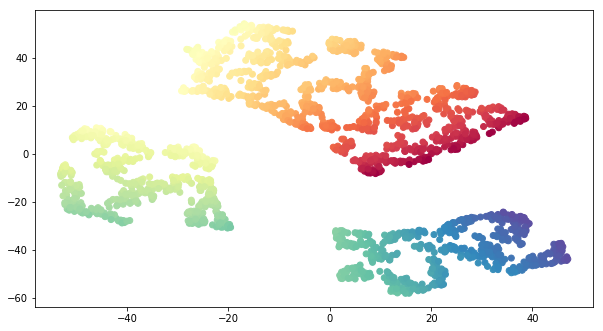

In [15]:
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_r = tsne.fit_transform(X)

#描画
fig_dimentionality(X_r)